## Кейс: Создание прогнозной модели для мобильного приложения: предсказание оценки пользователя (от 1 до 5) мобильному приложению</font>

**Компания**: пенсионный фонд, предоставляющий клиентам цифровые сервисы для управления пенсионными накоплениями.

**Продукт**: мобильное приложение фонда, которое позволяет пользователям получать персональную информацию, оформлять услуги и отслеживать пенсионные выплаты. Задача решается в рамках цифровой трансформации фонда, направленной на повышение удобства и удовлетворенности граждан при взаимодействии с госуслугами.

**Проблема продукта** Несмотря на рост цифровизации, часть пользователей остается недовольной функциональностью или стабильностью приложения, что приводит к низким оценкам и жалобам. Это мешает фонду объективно оценивать качество предоставляемых электронных услуг и снижает доверие к цифровой инфраструктуре.

**Необходимо:**

1. Изучить датасет, провести EDA, предоставить бизнес-заказчикам практические инсайты, поддерживающие принятие решений на основе данных.

2. Сформулировать аналитические выводы для ML-отдела для последующей разработки модели, прогнозирующей прибыльность рекламного показа.

3. Подготовить дашборд, который содержит графики и визуализации, отражающие ключевые выводы анализа данных. Он должен демонстрировать выявленные закономерности и инсайты, быть понятным для пользователей без технической подготовки и служить инструментом для принятия решений на основе данных.

4. Подготовить все артефакты работы и презентацию с решения:
    - Ноутбук .ipynb с расчетами и визуализациями инсайтов.
    - Дашборд на платформе gradio.app.
    - Презентацию для защиты решения (.pdf).

*Датасет содержит:*

|user_id |survey_creation_dt|survey_response_dt|language|age|gender|tenure_years|user_income|csat_level|
|--------|------------------|------------------|--------|---|------|------------|-----------|----------|
|id пользователя|дата создания опроса|дата ответа на опрос|язык пользователя|возраст пользователя|пол пользователя|стаж пользователя в годах|доход пользователя|оценка пользователя|

---

## I. Загрузка данных. Проведение EDA.

---
**1. Импорт библиотек**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

**2. Загрузка данных**

In [2]:
# Загружаем датасет
app_survey = pd.read_csv('app_survey.csv')

# Проверяем первые 5 строк датасета
print("Первые 5 строк:")
app_survey.head()

Первые 5 строк:


,user_id,survey_creation_dt,survey_response_dt,csat_level,language,age,gender,tenure_years,user_income
0,user_00000,2025-04-28 16:01:51,2025-05-07 03:24:28,1,RU,35-44,M,21.105392,10000-25000
1,user_00001,2025-04-25 03:02:23,2025-04-29 13:12:29,5,RU,35-44,M,21.129793,68000-100000
2,user_00002,2025-04-30 11:02:14,2025-04-20 21:09:01,5,RU,45-54,M,21.098074,NaN
3,user_00003,2025-04-25 09:32:18,2025-04-26 19:51:12,5,RU,45-54,M,21.115544,25000-44000
4,user_00004,2025-04-30 08:32:06,2025-05-01 18:33:35,5,RU,45-54,M,21.127961,44000-68000


**3. Первичный анализ данных**

In [3]:
# Определяем размер датасета
print("Размер датасета:", app_survey.shape)

# Собираем общую информацию о данных
print("\nОбщая информация о датасете:")
app_survey.info()

# Выводим статистику по столбцам
print("\nСтатистика по  столбцам:")
app_survey.describe(include='all')

Размер датасета: (42387, 9)

Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42387 entries, 0 to 42386
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             42387 non-null  object 
 1   survey_creation_dt  42387 non-null  object 
 2   survey_response_dt  42387 non-null  object 
 3   csat_level          42387 non-null  int64  
 4   language            35561 non-null  object 
 5   age                 40939 non-null  object 
 6   gender              42387 non-null  object 
 7   tenure_years        42387 non-null  float64
 8   user_income         32013 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 2.9+ MB

Статистика по  столбцам:


,user_id,survey_creation_dt,survey_response_dt,csat_level,language,age,gender,tenure_years,user_income
count,42387,42387,42387,42387.000000,35561,40939,42387,42387.000000,32013
unique,40065,40961,41983,NaN,1,5,2,NaN,6
top,user_29032,2025-04-25 03:02:23,2025-05-10 13:07:39,NaN,RU,35-44,M,NaN,10000-25000
freq,5,3,3,NaN,35561,11835,32413,NaN,18354
mean,NaN,NaN,NaN,4.102767,NaN,NaN,NaN,9.801147,NaN
std,NaN,NaN,NaN,1.506246,NaN,NaN,NaN,7.591410,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,2.132807,NaN
50%,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,9.308819,NaN
75%,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,16.941052,NaN


**4. Анализ пропусков значений в датасете**

,Количество пропусков,Процент пропусков
user_id,0,0.00
survey_creation_dt,0,0.00
survey_response_dt,0,0.00
csat_level,0,0.00
language,6826,16.10
age,1448,3.42
gender,0,0.00
tenure_years,0,0.00
user_income,10374,24.47


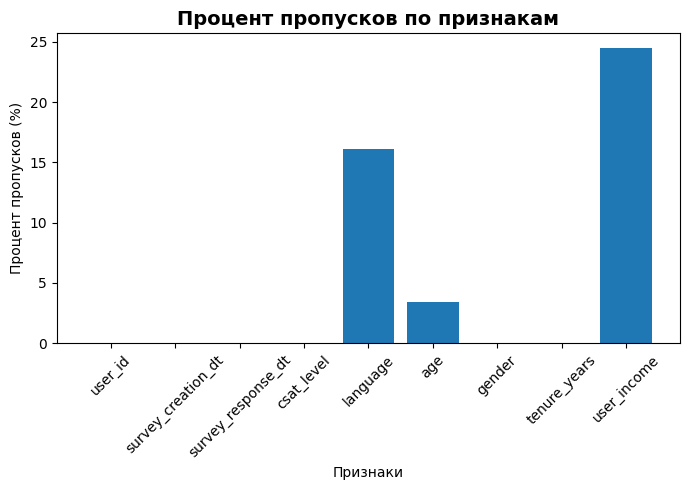

In [4]:
# Анализ пропусков
missing_data = app_survey.isnull().sum()
missing_percent = (missing_data / len(app_survey)) * 100

missing_df = pd.DataFrame({
    'Количество пропусков': missing_data,
    'Процент пропусков': missing_percent.round(2)
})

display(missing_df)

# Визуализация пропусков
fig, ax = plt.subplots(1, figsize=(7, 5))

bars = ax.bar(missing_df.index, missing_df['Процент пропусков'])
ax.set_title('Процент пропусков по признакам', fontsize=14, fontweight='bold')
ax.set_xlabel('Признаки')
ax.set_ylabel('Процент пропусков (%)')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**5. Анализ дубликатов в колонке user_id**

In [5]:
# Анализ дубликатов
duplicate_rows = app_survey.duplicated().sum()
duplicate_users = app_survey['user_id'].duplicated().sum()

print(f"Полные дубликаты строк: {duplicate_rows}")

if duplicate_users > 0:
    duplicate_counts = app_survey['user_id'].value_counts()
    repeated_users = duplicate_counts[duplicate_counts > 1]
    print(f"\nПользователи с несколькими откликами ({len(repeated_users)} пользователей):")
    print(f"Максимальное количество откликов: {repeated_users.max()}")

Полные дубликаты строк: 0

Пользователи с несколькими откликами (2049 пользователей):
Максимальное количество откликов: 5


**6. Предобработка данных**

*Преобразуем даты в формат datetime, заполним пропуски, создадим признак времени отклика и проведем порядковое кодирование категориальных переменных.*

In [6]:
# Сохраняем копию оригинального датасета
app_survey_original = app_survey.copy()

# Преобразовываем дату
app_survey['survey_creation_dt'] = pd.to_datetime(app_survey['survey_creation_dt'])
app_survey['survey_response_dt'] = pd.to_datetime(app_survey['survey_response_dt'])

# Обрабатываем пропуски
# Для language заполняем пропуски - "Неизвестно"
app_survey['language'] = app_survey['language'].fillna('Неизвестно')

# Для age заполняем пропуски - "Неизвестно"
app_survey['age'] = app_survey['age'].fillna('Неизвестно')

# Для user_income - создаем категорию "Не указан"
app_survey['user_income'] = app_survey['user_income'].fillna('Не указан')

# Создаем новые признаки из даты
# Время ответа (в днях)
app_survey['response_time_days'] = (
    app_survey['survey_response_dt'] - app_survey['survey_creation_dt']
).dt.days

# Преобразовываем порядковые признаки
# Порядок для возраста
age_order = ['18-24', '25-34', '35-44', '45-54', '55+', 'Неизвестно']
app_survey['age_encoded'] = pd.Categorical(
    app_survey['age'], 
    categories=age_order, 
    ordered=True
)

# Порядок для дохода
income_order = ['<10000', '10000-25000', '25000-44000', 
                '44000-68000', '68000-100000', '>100000', 'Не указан']
app_survey['income_encoded'] = pd.Categorical(
    app_survey['user_income'], 
    categories=income_order, 
    ordered=True
)

# Кодируем категориальные переменные
# Для возраста и дохода
age_mapping = {age: i for i, age in enumerate(age_order)}
income_mapping = {income: i for i, income in enumerate(income_order)}

app_survey['age_numeric'] = app_survey['age'].map(age_mapping)
app_survey['income_numeric'] = app_survey['user_income'].map(income_mapping)

# Для полового признака
app_survey['gender_encoded'] = app_survey['gender'].map({'M': 0, 'F': 1})

# Выводим результаты
print(f"Новые столбцы: {list(app_survey.columns[-8:])}")
print(f"\nТипы данных после преобразования:")
print(app_survey.dtypes)
print("\nПервые 5 строк:")
app_survey.head()

Новые столбцы: ['tenure_years', 'user_income', 'response_time_days', 'age_encoded', 'income_encoded', 'age_numeric', 'income_numeric', 'gender_encoded']

Типы данных после преобразования:
user_id                       object
survey_creation_dt    datetime64[ns]
survey_response_dt    datetime64[ns]
csat_level                     int64
language                      object
age                           object
gender                        object
tenure_years                 float64
user_income                   object
response_time_days             int64
age_encoded                 category
income_encoded              category
age_numeric                  float64
income_numeric                 int64
gender_encoded                 int64
dtype: object

Первые 5 строк:


,user_id,survey_creation_dt,survey_response_dt,csat_level,language,age,gender,tenure_years,user_income,response_time_days,age_encoded,income_encoded,age_numeric,income_numeric,gender_encoded
0,user_00000,2025-04-28 16:01:51,2025-05-07 03:24:28,1,RU,35-44,M,21.105392,10000-25000,8,35-44,10000-25000,2.0,1,0
1,user_00001,2025-04-25 03:02:23,2025-04-29 13:12:29,5,RU,35-44,M,21.129793,68000-100000,4,35-44,68000-100000,2.0,4,0
2,user_00002,2025-04-30 11:02:14,2025-04-20 21:09:01,5,RU,45-54,M,21.098074,Не указан,-10,45-54,Не указан,3.0,6,0
3,user_00003,2025-04-25 09:32:18,2025-04-26 19:51:12,5,RU,45-54,M,21.115544,25000-44000,1,45-54,25000-44000,3.0,2,0
4,user_00004,2025-04-30 08:32:06,2025-05-01 18:33:35,5,RU,45-54,M,21.127961,44000-68000,1,45-54,44000-68000,3.0,3,0


**Выводы по качеству данных:**

- Значительный объем пропущенных данных. Почти 25% пропусков в данных о доходах, может указывать на возможные технические сбои или нежелание пользователей делиться информацией

- Дублирующиеся ответы пользователей. Несколько откликов от одного пользователя может свидетельствовать о технических проблемах или его неудовлетворенности приложением

- Временные аномалии. Отрицательное время ответа (отклик до создания опроса) явно указывают на технические сбои
---

**7. Анализ целевой переменной (csat_level)**

Базовая статистика:


count    42387.000000
mean         4.102767
std          1.506246
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: csat_level, dtype: float64


Распределение оценок:


,Количество,Процент
csat_level,,
1,6732,15.88
2,1187,2.80
3,2175,5.13
4,3192,7.53
5,29101,68.66



Ключевые метрики:

Общее количество оценок: 42,387
Средняя оценка: 4.10

Положительные оценки (4-5): 32,293 (76.2%)
Нейтральные оценки (3): 2,175 (5.1%)
Негативные оценки (1-2): 7,919 (18.7%)


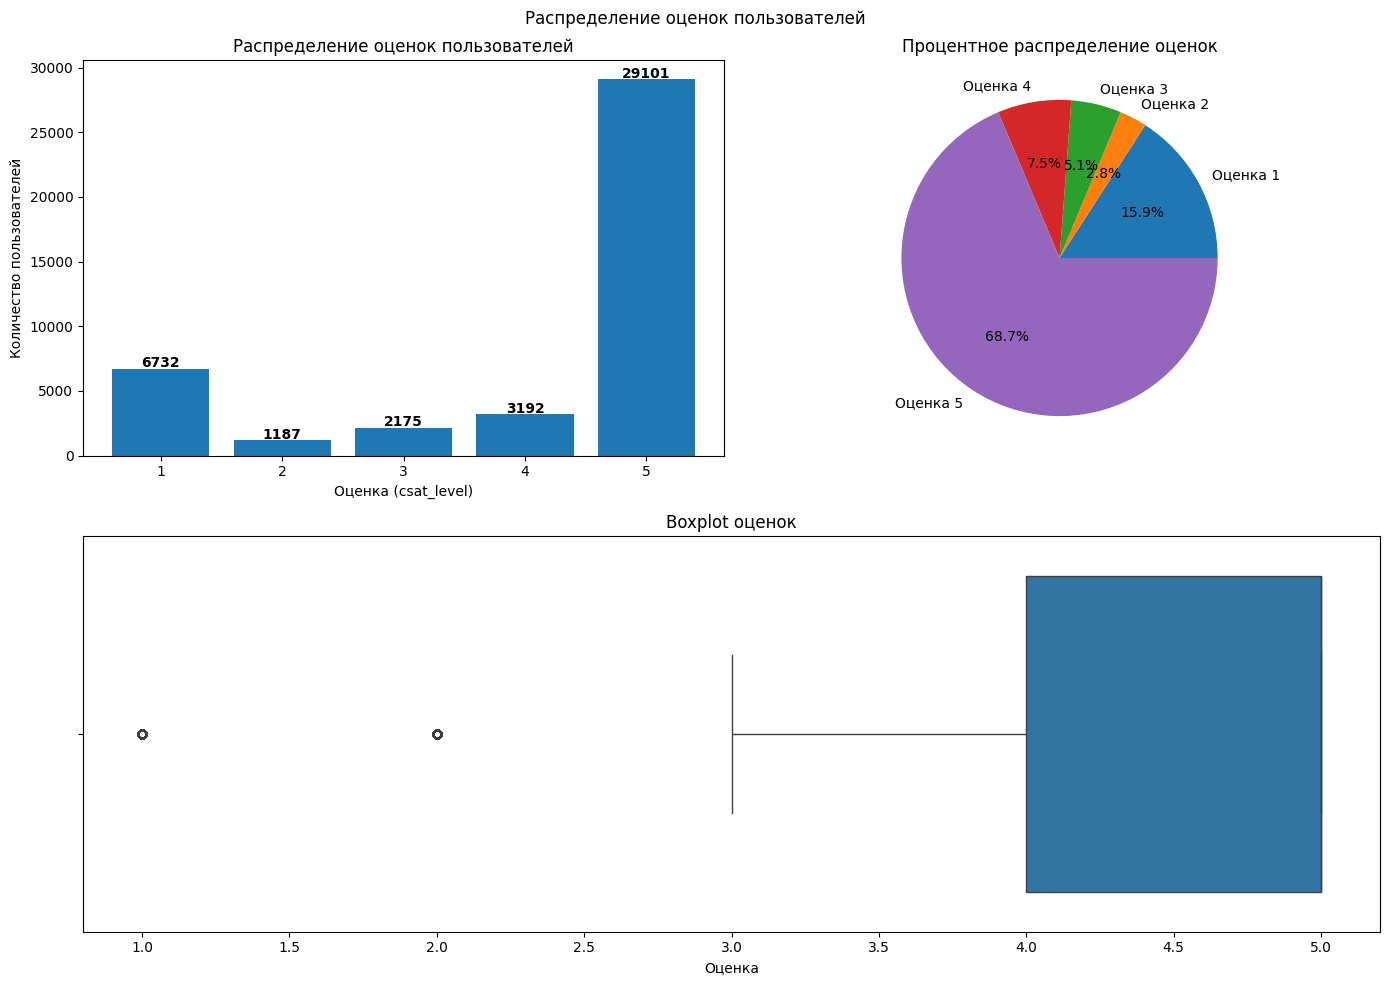

In [7]:
# Базовая статистика
print("Базовая статистика:")
csat_stats = app_survey['csat_level'].describe()
display(csat_stats)

# Распределение оценок
print("\nРаспределение оценок:")
csat_distribution = app_survey['csat_level'].value_counts().sort_index()
csat_percentage = (csat_distribution / len(app_survey) * 100).round(2)

distribution_df = pd.DataFrame({
    'Количество': csat_distribution,
    'Процент': csat_percentage,
})
display(distribution_df)

# Подробная статистика оценок 
print("\nКлючевые метрики:")

total_users = len(app_survey)
positive_reviews = len(app_survey[app_survey['csat_level'] >= 4])
negative_reviews = len(app_survey[app_survey['csat_level'] < 3])

csat_score = app_survey['csat_level'].mean()

print(f"\nОбщее количество оценок: {total_users:,}")
print(f"Средняя оценка: {csat_score:.2f}")
print(f"\nПоложительные оценки (4-5): {positive_reviews:,} ({positive_reviews/total_users*100:.1f}%)")
print(f"Нейтральные оценки (3): {len(app_survey[app_survey['csat_level'] == 3]):,} ({len(app_survey[app_survey['csat_level'] == 3])/total_users*100:.1f}%)")
print(f"Негативные оценки (1-2): {negative_reviews:,} ({negative_reviews/total_users*100:.1f}%)")

# Визуализация распределения оценок
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2, figure=fig)

# Гистограмма распределения
ax1 = fig.add_subplot(gs[0, 0])
ax1.bar(distribution_df.index, distribution_df['Количество'])
ax1.set_title('Распределение оценок пользователей')
ax1.set_xlabel('Оценка (csat_level)')
ax1.set_ylabel('Количество пользователей')

# Добавляем значения на столбцы
for i, v in enumerate(distribution_df['Количество']):
    ax1.text(i + 1, v + 100, str(int(v)), 
             ha='center', fontweight='bold')

# Круговая диаграмма
ax2 = fig.add_subplot(gs[0, 1])
wedges, texts, autotexts = ax2.pie(
    distribution_df['Процент'], 
    labels=[f'Оценка {i}' for i in distribution_df.index],
    autopct='%1.1f%%'
)
ax2.set_title('Процентное распределение оценок')

# Боксплот
ax3 = fig.add_subplot(gs[1, :])
sns.boxplot(data=app_survey, x='csat_level', ax=ax3)
ax3.set_title('Boxplot оценок')
ax3.set_xlabel('Оценка')

plt.suptitle('Распределение оценок пользователей')
plt.tight_layout()
plt.show()

**8. Анализ категориальных признаков**

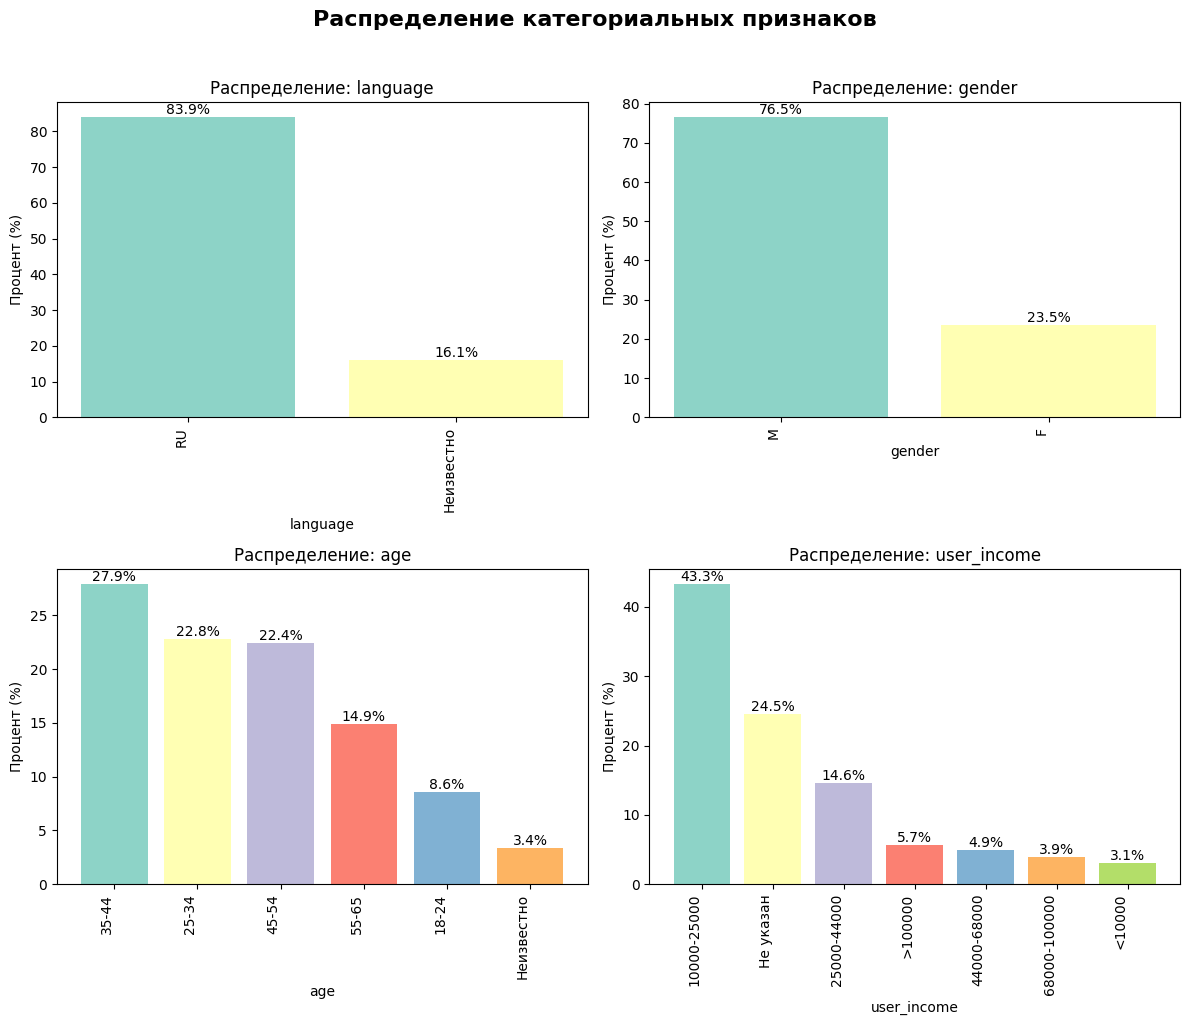

Влияние возраста на оценки:


,Средняя оценка,Количество,Стандартное отклонение,% Негативных
age,,,,
55-65,4.17,6312,1.45,17.09
45-54,4.15,9483,1.47,17.74
35-44,4.14,11835,1.48,17.63
Неизвестно,4.13,1448,1.45,16.99
25-34,4.03,9669,1.56,20.55
18-24,3.91,3640,1.61,23.05



Влияние дохода на оценки:


,Средняя оценка,Количество,Стд отклонение,% Негативных
user_income,,,,
10000-25000,4.24,18354,1.40,15.09
<10000,4.22,1299,1.42,15.70
25000-44000,4.20,6206,1.45,16.65
44000-68000,3.95,2095,1.60,22.29
>100000,3.92,2418,1.58,22.87
Не указан,3.90,10374,1.64,24.03
68000-100000,3.88,1641,1.61,24.38


In [ ]:
categorical_cols = ['language', 'gender', 'age', 'user_income']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    ax = axes[idx]
    
    # Распределение
    value_counts = app_survey[col].value_counts()
    percentages = (value_counts / len(app_survey) * 100).round(1)
    
    # Столбчатая диаграмма
    bars = ax.bar(range(len(value_counts)), percentages.values, 
                  color=plt.cm.Set3(np.arange(len(value_counts))))
    
    ax.set_title(f'Распределение: {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Процент (%)')
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation=90, ha='right')
    
    # Добавляем значения на столбцы
    for i, pct in enumerate(percentages.values):
        ax.text(i, pct, f'{pct}%', 
                ha='center', va='bottom')

plt.suptitle('Распределение категориальных признаков', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Детальный анализ признаков
# Создаем сегменты
app_survey['csat_segment'] = pd.cut(
    app_survey['csat_level'],
    bins=[0, 2, 3, 5],
    labels=['Негативные (1-2)', 'Нейтральные (3)', 'Положительные (4-5)'])

# Влияние возраста на оценки
age_csat = app_survey.groupby('age').agg({
    'csat_level': ['mean', 'count', 'std'],
    'csat_segment': lambda x: (x == 'Негативные (1-2)').sum() / len(x) * 100
}).round(2)

age_csat.columns = ['Средняя оценка', 'Количество', 'Стандартное отклонение', '% Негативных']
age_csat = age_csat.sort_values('Средняя оценка', ascending=False)

print("Влияние возраста на оценки:")
display(age_csat)

# Влияние дохода на оценки
income_csat = app_survey.groupby('user_income').agg({
    'csat_level': ['mean', 'count', 'std'],
    'csat_segment': lambda x: (x == 'Негативные (1-2)').sum() / len(x) * 100
}).round(2)

income_csat.columns = ['Средняя оценка', 'Количество', 'Стд отклонение', '% Негативных']
income_csat = income_csat.sort_values('Средняя оценка', ascending=False)

print("\nВлияние дохода на оценки:")
display(income_csat)

**9. Анализ числовых признаков и временных данных**

Анализ стажа пользователей:

Статистика по стажу пользователей:
Средний стаж: 9.8 лет
Медианный стаж: 9.3 лет
Минимальный стаж: 0.0 лет
Максимальный стаж: 21.2 лет

Анализ времени отклика на опрос:
Аномальные значения: 18400 оценок получено до создания опроса
Для исправления аномальных значений времени, будем считать разницу во времени по модулю

Статистика по времени отклика:
Среднее время отклика: 7.2 дней
Медианное время отклика: 6.0 дней
Минимальное время отклика: 0.0 дней
Максимальное время отклика: 31.0 дней

Корреляция времени отклика с оценкой:
Корреляция: -0.005
Слабая связь между временем отклика и оценкой


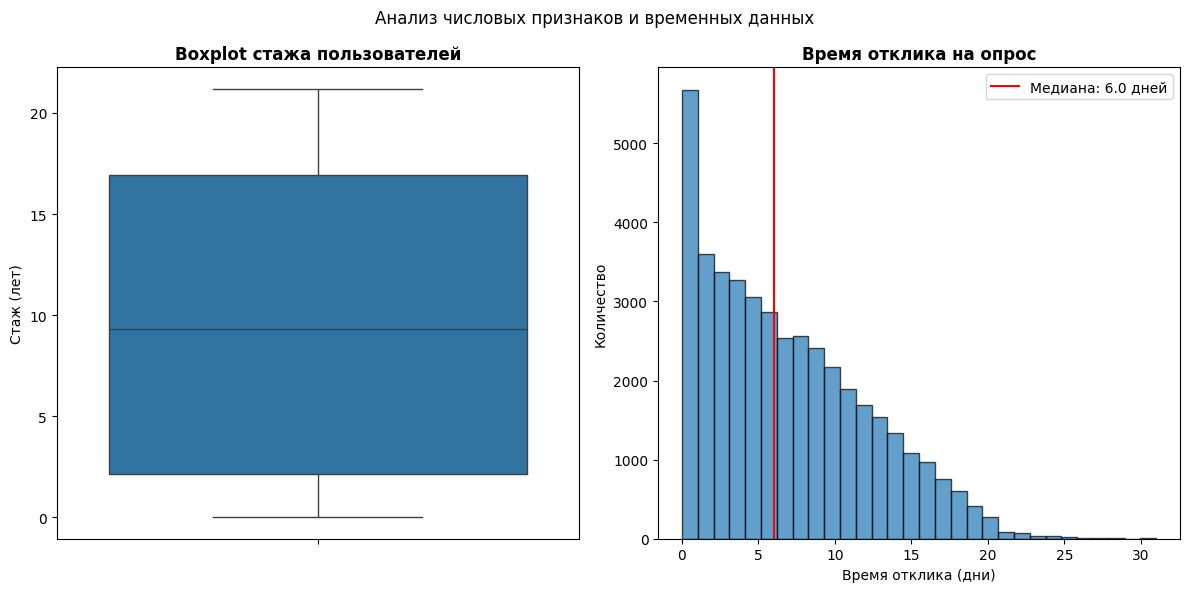

In [9]:
# Анализ стажа пользователей
print("Анализ стажа пользователей:")

# Статистики по стажу пользователей
print("\nСтатистика по стажу пользователей:")
tenure_years_stats = app_survey['tenure_years'].describe()

print(f"Средний стаж: {tenure_years_stats['mean']:.1f} лет")
print(f"Медианный стаж: {tenure_years_stats['50%']:.1f} лет")
print(f"Минимальный стаж: {tenure_years_stats['min']:.1f} лет")
print(f"Максимальный стаж: {tenure_years_stats['max']:.1f} лет")

# Анализ времени отклика
print("\nАнализ времени отклика на опрос:")

# Отрицательные значения времени (отклик раньше опроса)
negative_time = app_survey[app_survey['response_time_days'] < 0]
print(f"Аномальные значения: {len(negative_time)} оценок получено до создания опроса")
print("Для исправления аномальных значений времени, будем считать разницу во времени по модулю")

# Чтобы исправить аномалии (отрицательные значения времени) берем разницу по модулю
app_survey['response_time_days_abs'] = app_survey['response_time_days'].abs()

# Статистики по времени
print("\nСтатистика по времени отклика:")
response_stats = app_survey['response_time_days_abs'].describe()
print(f"Среднее время отклика: {response_stats['mean']:.1f} дней")
print(f"Медианное время отклика: {response_stats['50%']:.1f} дней")
print(f"Минимальное время отклика: {response_stats['min']:.1f} дней")
print(f"Максимальное время отклика: {response_stats['max']:.1f} дней")

# Анализ корреляции времени ответа с оценкой
print("\nКорреляция времени отклика с оценкой:")
corr_time_csat = app_survey[['response_time_days_abs', 'csat_level']].corr().iloc[0, 1]
print(f"Корреляция: {corr_time_csat:.3f}")
if abs(corr_time_csat) > 0.1:
    print(f"Заметная связь между временем отклика и оценкой")
else:
    print("Слабая связь между временем отклика и оценкой")

# Визуализация распределения числовых и временных признаков
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot стажа
sns.boxplot(y=app_survey['tenure_years'], ax=axes[0])
axes[0].set_title('Boxplot стажа пользователей', fontweight='bold')
axes[0].set_ylabel('Стаж (лет)')

# Гистограмма времени отклика
axes[1].hist(app_survey['response_time_days_abs'], bins=30, 
             edgecolor='black', alpha=0.7)
axes[1].set_title('Время отклика на опрос', fontweight='bold')
axes[1].set_xlabel('Время отклика (дни)')
axes[1].set_ylabel('Количество')
axes[1].axvline(app_survey['response_time_days_abs'].median(), 
                color='red', linestyle='-', 
                label=f'Медиана: {app_survey["response_time_days_abs"].median():.1f} дней')
axes[1].legend()

plt.suptitle('Анализ числовых признаков и временных данных')
plt.tight_layout()
plt.show()

*Ищем аномальные сочетания возраста и стажа пользователя*

In [10]:
# Проверим аномальность данных в сочетании стажа и возраста
# Отфильтруем пользователей, у которых стаж больше 20 лет, а возраст менее 25 лет
filtered_rows = app_survey[(app_survey['tenure_years'] > 20) & (app_survey['age'] == '18-24')]
print(f"Найдено {filtered_rows.shape[0]} пользователей с аномальным сочетанием стажа и возраста")

# Посмотрим у этих пользователей остальные признаки.
selected_columns = ['user_id', 'csat_level', 'language', 'age', 'tenure_years', 'user_income', 'response_time_days']
filtered_rows_selected = filtered_rows[selected_columns]

print("\nПользователи, у которых стаж больше 20 лет, а возраст менее 25 лет:")
print(filtered_rows_selected)

Найдено 10 пользователей с аномальным сочетанием стажа и возраста

Пользователи, у которых стаж больше 20 лет, а возраст менее 25 лет:
          user_id  csat_level language    age  tenure_years  user_income  \
925    user_00888           1       RU  18-24     21.168679  25000-44000   
1335   user_01285           1       RU  18-24     21.149923    Не указан   
22215  user_21582           4       RU  18-24     21.103064  44000-68000   
23082  user_22388           1       RU  18-24     21.085149    Не указан   
26766  user_25780           3       RU  18-24     20.624531  10000-25000   
28273  user_27163           1       RU  18-24     21.146582    Не указан   
29124  user_27944           5       RU  18-24     21.125277  25000-44000   
29179  user_22388           1       RU  18-24     21.133130    Не указан   
33881  user_32227           5       RU  18-24     20.249496  25000-44000   
41092  user_21582           4       RU  18-24     21.096305  44000-68000   

       response_time_days  


**Выводы по анализу и распределению данных:**

- Высокий общий уровень удовлетворенности - 68,7% пользователей поставили максимальную оценку

- Пользователи преимущественно со стажем более 9 лет

- Найдено 10 пользователей из возрастной группы 18 - 24 года, у которых стаж более 20 лет, что невозможно. У 4 из этих пользователей не указан доход, у 7 дата отклика более ранняя, чем дата опроса. Высокая вероятность того, что эти пользователи столкнулись с техническим сбоем в работе приложения. Что могло привести к низкой оценке ими приложения

- Дисбаланс по половому признаку - значительный перекос в сторону мужчин среди участников опроса

- Различия по возрастным группам - более молодые пользователи (18–24 года) больше ставят низкие оценки, возможно из-за более высоких ожиданий или проблем с приложением

---

**10. Корреляционный анализ**

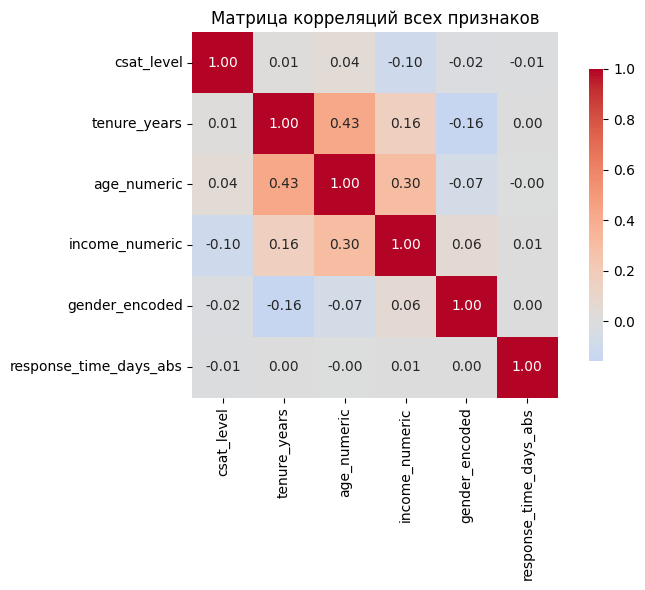


Выводы корреляционного анализа:

Значимая корреляция (> 0.1):
   • income_numeric: отрицательная связь (-0.101)


In [11]:
# Подготовка данных для корреляционного анализа
correlation_data = app_survey[[
    'csat_level',
    'tenure_years',
    'age_numeric',
    'income_numeric',
    'gender_encoded',
    'response_time_days_abs'
]].copy()

# Расчет матрицы корреляций
corr_matrix = correlation_data.corr()

# Визуализация heatmap
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            ax=ax,
            fmt='.2f',
            cbar_kws={'shrink': 0.8})
ax.set_title('Матрица корреляций всех признаков')

plt.tight_layout()
plt.show()

# Интерпретация результатов
print("\nВыводы корреляционного анализа:")

# Корреляции с целевой переменной
csat_correlations = corr_matrix['csat_level'].drop('csat_level').sort_values(ascending=False)

print("\nЗначимая корреляция (> 0.1):")
moderate_corrs = csat_correlations[(csat_correlations.abs() > 0.1) & 
                                    (csat_correlations.index != 'csat_level')]
for feature, corr in moderate_corrs.items():
    direction = "положительная" if corr > 0 else "отрицательная"
    print(f"   • {feature}: {direction} связь ({corr:.3f})")



---
**11. ОБЩИЕ ВЫВОДЫ ПО РАЗВЕДОЧНОМУ АНАЛИЗУ ДАННЫХ**
- Датасет имеет значительные пропуски, особенно в доходе (почти четверть данных) Это может указывать на технические сбои в приложении.

- Дубликаты user_id указывают на повторные опросы, что может быть связано с техническими сбоями или неудовлетворенностью пользователей.

- Аномалии во времени отклика. Отрицательный response_time_days (отклик до создания опроса) — явный технический сбой. Слишком долгий ответ (более 30 дней) — возможно проблема с уведомлениями или доступом.

- Аномалии данных в сочетании стажа и возраста пользователей (стаж сравнимый или больше, чем возраст пользователя).

- Пользователи в основном опытные (стаж более 10 лет), что коррелирует с высокой удовлетворенностью.

- Сильный перекос в сторону мужчин — возможно, приложение больше ориентировано на мужскую аудиторию или мужчины активнее участвуют в опросах.

- Аудитория среднего возраста и среднего дохода. Высокий процент пропусков в доходе может указывать на нежелание делиться данными или технические проблемы с опросом.

- Распределение оценок сильно смещено в сторону оценки 5 (68.7% от общего количества оценок)

- Молодые пользователи менее удовлетворены — возможно, ожидания выше или интерфейс приложения для них неудобен.

- Высокодоходные и неуказавшие доход пользователи менее удовлетворены. Возможно, приложение не соответствует их ожиданиям или вопрос о доходе вызывает раздражение.

- Приложение имеет высокую общую удовлетворенность, но проблемы с молодыми пользователями, высокодоходными и возможно теми, кто сталкивается с техническими сбоями (дубликаты, пропуски). Дубликаты и пропуски могут быть маркерами недовольства.

---
# II. Построение гипотез

---
**Гипотеза 1: есть ли связь между наличием дубликатов в user_id и низкими оценками**
- H0 (нулевая гипотеза): Наличие дубликатов (пользователь ответил несколько раз) не связано с низкими оценками

- H1 (альтернативная гипотеза): Есть статистически значимая связь между дубликатами и низкими оценками

**Гипотеза 2: связаны ли пропуски в language, age, user_income с низкими оценками**

- H0 (нулевая гипотеза): Нет связи между двумя категориальными переменными (language и csat_level (1-2), age и csat_level (1-2), user_income и csat_level (1-2))

- H1 (альтернативная гипотеза): Есть статистически значимая связь

**Гипотеза 3: связаны ли низкие оценки с определенными временными характеристиками (час создания опроса, день недели)**

- H0 (нулевая гипотеза): Нет статистически значимой связи между временными характеристиками создания опроса (день недели, час) и низкими оценками (csat_level 1-2).

- H1 (альтернативная гипотеза): Низкие оценки статистически значимо чаще встречаются в определенные периоды, что может указывать на влияние нагрузки на приложение или специфики пользовательской активности.

**Гипотеза 4: связаны ли стабильно низкие оценки у повторно отвечающих пользователей с повторяемостью их действий (время ответа, заполнение полей)?**
- H0 (нулевая гипотеза): Пользователи со стабильно низкими оценками (все ответы 1-2) не отличаются по повторяемости действий от пользователей с меняющимися оценками.

- H1 (альтернативная гипотеза): Пользователи со стабильно низкими оценками демонстрируют повторяемость действий — например, всегда отвечают через одинаковое время, всегда пропускают одни и те же поля, что может указывать на систематическую проблему в их опыте использования.